### Data Preparation

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merge_df.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [33]:
# Checking the number of mice.
mouse_count = len(pd.unique(merge_df['Mouse ID']))
print(f"Number of mice: {mouse_count}")

Number of mice: 249


In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = merge_df[merge_df["Mouse ID"].duplicated() == True]
dupes.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [35]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000
mean,12.827251,25.593674,22.536496,51.273592,1.176399
std,7.185777,3.951053,12.705351,9.269633,1.144157
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,10.000000,46.035588,0.000000
50%,13.000000,26.000000,20.000000,50.539831,1.000000
75%,20.000000,29.000000,35.000000,57.309933,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dupes = merge_df.drop_duplicates(subset="Mouse ID", keep='last', inplace=False, ignore_index=False)
no_dupes.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0


In [37]:
# Checking the number of mice in the clean DataFrame. Should match earlier unique mouse ID count
nd_mouse_count = len(no_dupes.index)
print (f"New Number of mice: {nd_mouse_count}")

New Number of mice: 249


### Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#no_dupes.info()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_stats_drug = no_dupes.groupby(["Drug Regimen"])

# Mean
tumor_volume_mean = (tumor_stats_drug["Tumor Volume (mm3)"]).mean()
#print(tumor_volume_mean)

# Median
tumor_volume_median = (tumor_stats_drug["Tumor Volume (mm3)"]).median()
#print(tumor_volume_median)

# Variance
tumor_volume_var = (tumor_stats_drug["Tumor Volume (mm3)"]).var()
#print(tumor_volume_var)

# Standard Deviation
tumor_volume_std = (tumor_stats_drug["Tumor Volume (mm3)"]).std()
#print(tumor_volume_std)

# SEM of the tumor volume. 
tumor_volume_sem = (tumor_stats_drug["Tumor Volume (mm3)"]).sem()
#print(tumor_volume_sem)

# Assemble the resulting series into a single summary DataFrame.
tumor_volume_df = pd.DataFrame({
    "Tumor Volume Mean" : tumor_volume_mean,
    "Tumor Volume Median" : tumor_volume_median,
    "Tumor Volume Variance" : tumor_volume_var,
    "Tumor Volume Standard Dev" : tumor_volume_std,
    "Tumor Volume Standard Error" : tumor_volume_sem,
})
tumor_volume_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Dev,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_volume_agg = no_dupes.groupby(no_dupes["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean",
                                                                                        "median",
                                                                                          "var",
                                                                                         "std",
                                                                                         "sem"]})
tumor_volume_agg
                                                                                          
                                                                                          

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane              36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

### Bar and Pie Charts

In [13]:
# Creating dataframe grouped by drug regimen for following bar plot and pyplot
grouped_drug_df = merge_df.groupby(["Drug Regimen"])
#print(grouped_drug_df)
#grouped_drug_df.count().head(10)
timepoints = grouped_drug_df["Timepoint"].count()
#print (timepoints)
timepoints_df = pd.DataFrame({"Timepoints Total":timepoints})
print(timepoints_df)

              Timepoints Total
Drug Regimen                  
Capomulin                  230
Ceftamin                   178
Infubinol                  178
Ketapril                   188
Naftisol                   186
Placebo                    181
Propriva                   161
Ramicane                   228
Stelasyn                   181
Zoniferol                  182


In [15]:
# Creating index of Drug Regimens for following bar plot and pyplot
drug_regimen = merge_df.set_index('Drug Regimen')


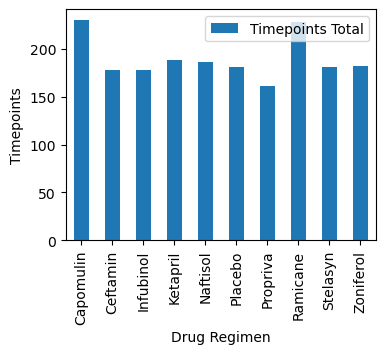

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_bar = timepoints_df.plot(kind="bar",figsize=(4,3),xlabel="Drug Regimen",
                                ylabel="Timepoints")


In [17]:
#Creating regimens list for easier plotting
regimens = merge_df["Drug Regimen"].unique()
print(regimens)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


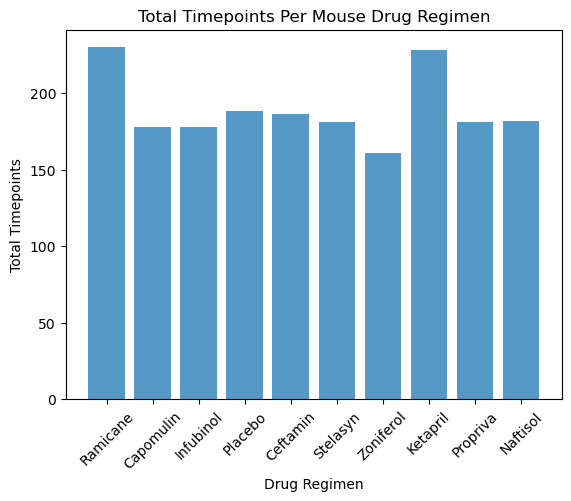

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.title("Total Timepoints Per Mouse Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")

plt.bar(regimens, timepoints, alpha=0.75, align="center")
plt.xticks((regimens), rotation = 45)
plt.show()


In [19]:
# Getting grouped-by-sex info for following pie chart and pyplot
sx_count = no_dupes["Sex"].value_counts()
sx_count_df = pd.DataFrame(sx_count)


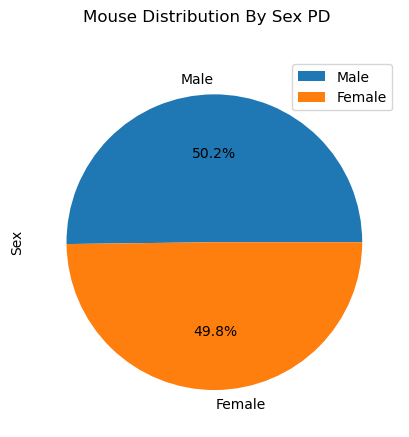

In [20]:
# Pandas Pie Plot: generate a pie plot showing the distribution of female versus male mice using Pandas
msx_pie = sx_count_df.plot(kind="pie", autopct='%1.1f%%', ylabel = "Sex", subplots=True, title="Mouse Distribution By Sex PD")


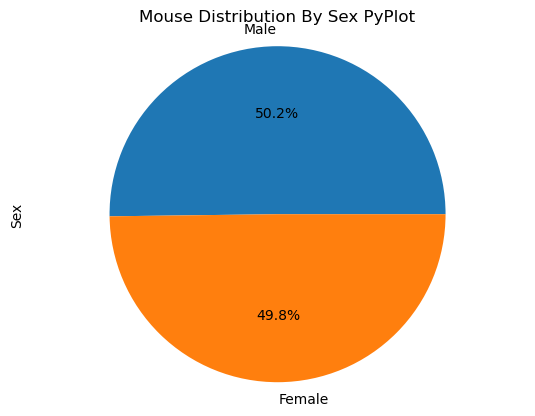

In [21]:
# Py Pie Plot: generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Mouse Distribution By Sex PyPlot")
plt.pie(sx_count, labels=sx_count.index.values, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


### Quartiles, Outliers, and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:"Capomulin", "Ramicane", "Infubinol", "Ceftamin"
grouped_mouse_df = merge_df.copy()

# Start by getting the last (greatest) timepoint for each mouse
sorted = grouped_mouse_df.sort_values(by="Timepoint")
last_timepoint = sorted.drop_duplicates("Mouse ID", keep="last")

# Filter for the four regimens"Capomulin", "Ramicane", "Infubinol", "Ceftamin"
last_timepoint_regimens = last_timepoint.loc[(last_timepoint["Drug Regimen"]=="Capomulin")|(last_timepoint["Drug Regimen"]=="Ceftamin")|(last_timepoint["Drug Regimen"]=="Ramicane")|(last_timepoint["Drug Regimen"]=="Infubinol")]
#ltr = last_timepoint_regimens.set_index("Drug Regimen")
#ltr

In [59]:
last_timepoint_regimens[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,36.667568
Ceftamin,57.753977
Infubinol,58.178246
Ramicane,36.191390


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin_tum_vol = []
ramicane_tum_vol = []
infubinol_tum_vol = []
ceftamin_tum_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments:
    
    # add subset 
    if x=="Capomulin":
        capomulin_tum_vol.append(last_timepoint_regimens["Tumor Volume (mm3)"])
    elif x=="Ramicane":
        ramicane_tum_vol.append(last_timepoint_regimens["Tumor Volume (mm3)"])
    elif x=="Infubinol":
        infubinol_tum_vol.append(last_timepoint_regimens["Tumor Volume (mm3)"])
    elif x=="Ceftamin":
        ceftamin_tum_vol.append(last_timepoint_regimens["Tumor Volume (mm3)"])
        

In [62]:
# Determine outliers using upper and lower bounds
quartiles = last_timepoint_regimens["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
iqr1_5 = iqr * 1.5
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - iqr1_5
upper_bound = upperq + iqr1_5
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume is: 37.1877438025
The upper quartile of tumor volume is: 59.930261755
The interquartile range of tumor volume is: 22.742517952499995
The the median tumor volume is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


NameError: name 'ax2' is not defined

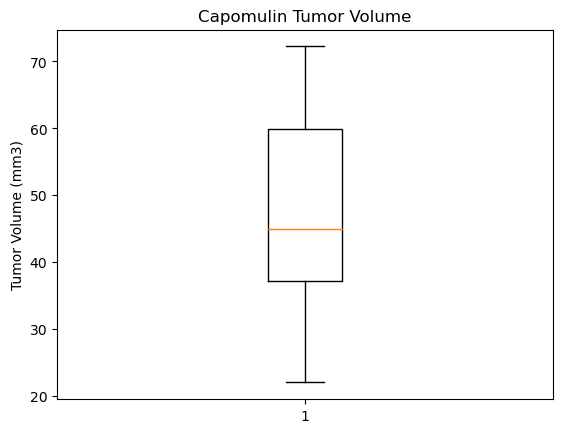

In [69]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#plt.boxplot(capomulin_tum_vol, showmeans=True) 
#plt.grid()
#plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin_tum_vol)
ax2.set_title('Ramicane Tumor Volume')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(ramicane_tum_vol)
plt.show()


In [ ]:
### Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [ ]:
### Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



In [ ]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
